In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
meisd = pd.read_csv('C:/Users/juwieczo/DataspellProjects/meisd_project/data/MEISD_text.csv')

In [3]:
len(meisd)

20017

In [39]:
print(meisd[['emotion', 'emotion2', 'emotion3']].stack().value_counts())

disgust        5987
joy            3947
anger          3623
sadness        3611
neutral        3330
acceptance     2966
surprise       2184
fear           1122
like            466
Neutral         404
Disgust         369
acceptance      250
Surprise        155
Anger           131
neutral          81
Fear             79
Joy              64
Sadness          59
digust           33
Fear             24
fear             18
Neutral          18
Sadness          11
Surprise          9
 disgust          9
 surprise         3
 anger            3
ANGER             3
 sadness          2
sadness           2
Fera              1
anger1            1
l                 1
sadnes            1
sur               1
an                1
faer              1
df                1
  disgust         1
asadness          1
Name: count, dtype: int64


In [40]:
from collections import Counter

# Surowe dane zliczeń (możesz też je wczytać z pliku, jeśli masz)
raw_emotion_counts = {
    "disgust": 5987,
    "joy": 3947,
    "anger": 3623,
    "sadness": 3611,
    "neutral": 3330,
    "acceptance": 2966,
    "surprise": 2184,
    "fear": 1122,
    "like": 466,
    "Neutral": 404,
    "Disgust": 369,
    "acceptance": 250,
    "Surprise": 155,
    "Anger": 131,
    "neutral": 81,
    "Fear": 79,
    "Joy": 64,
    "Sadness": 59,
    "digust": 33,
    "Fear": 24,
    "fear": 18,
    "Neutral": 18,
    "Sadness": 11,
    "Surprise": 9,
    " disgust": 9,
    " surprise": 3,
    " anger": 3,
    "ANGER": 3,
    " sadness": 2,
    "sadness": 2,
    "Fera": 1,
    "anger1": 1,
    "l": 1,
    "sadnes": 1,
    "sur": 1,
    "an": 1,
    "faer": 1,
    "df": 1,
    "  disgust": 1,
    "asadness": 1
}

# Mapa normalizacji emocji
emotion_mapping = {
    "disgust": "disgust", "digust": "disgust", " disgust": "disgust", "  disgust": "disgust",
    "anger": "anger", "anger1": "anger", " anger": "anger", "Anger": "anger", "ANGER": "anger",
    "sadness": "sadness", "sadnes": "sadness", "asadness": "sadness", " sadness": "sadness",
    "Sadness": "sadness", "sadness": "sadness",
    "fear": "fear", "faer": "fear", "Fear": "fear", "Fera": "fear",
    "joy": "joy", "Joy": "joy",
    "neutral": "neutral", "Neutral": "neutral",
    "acceptance": "acceptance",
    "surprise": "surprise", "sur": "surprise", "Surprise": "surprise", " surprise": "surprise",
    "like": "like",
    "df": None, "l": None, "an": None  # błędy lub noise
}

# Zlicz emocje po normalizacji
normalized_counts = Counter()

for emo, count in raw_emotion_counts.items():
    key = str(emo).strip()
    norm = emotion_mapping.get(key.lower())
    if norm:  # pomijamy None
        normalized_counts[norm] += count

# Oblicz procentowy udział
total = sum(normalized_counts.values())
emotion_percentages = {k: (v / total) * 100 for k, v in sorted(normalized_counts.items(), key=lambda x: x[1], reverse=True)}

# Wyświetlenie wyników
print(f"Łączna liczba emocji: {total}\n")
print("Liczba wystąpień (po normalizacji):")
for emo, count in normalized_counts.most_common():
    print(f"{emo:12s}: {count:5d} ({emotion_percentages[emo]:.2f}%)")


Łączna liczba emocji: 17243

Liczba wystąpień (po normalizacji):
disgust     :  6399 (37.11%)
joy         :  4011 (23.26%)
anger       :  3761 (21.81%)
surprise    :  2197 (12.74%)
like        :   466 (2.70%)
acceptance  :   250 (1.45%)
neutral     :    99 (0.57%)
fear        :    43 (0.25%)
sadness     :    17 (0.10%)


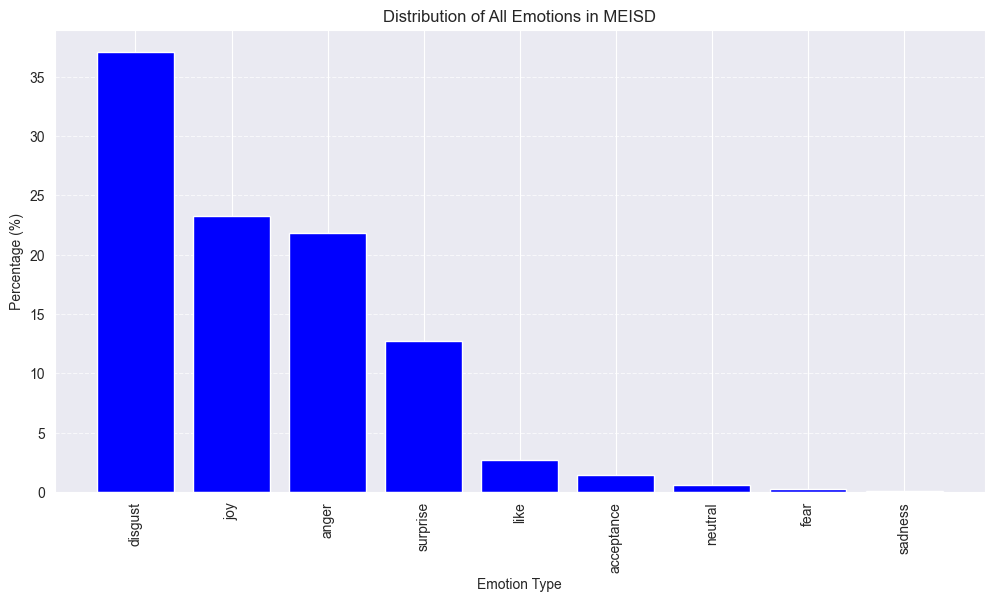

In [41]:
# Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.bar(emotion_percentages.keys(), emotion_percentages.values(), color='blue')
plt.xlabel("Emotion Type")
plt.ylabel("Percentage (%)")
plt.title("Distribution of All Emotions in MEISD")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()


In [42]:
import json
def load_data(file_path):
    with open(file_path, "r", encoding='utf-8') as file:
        data = json.load(file)
    return data


In [43]:
esc = load_data("C:/Users/juwieczo/DataspellProjects/meisd_project/data/ESConv.json")

In [44]:
intensities = []

for entry in esc:
    seeker_scores = entry.get("survey_score", {}).get("seeker", {})
    initial = seeker_scores.get("initial_emotion_intensity")
    final = seeker_scores.get("final_emotion_intensity")
    emotion = entry.get("emotion_type")
    problem = entry.get("problem_type")
    if initial and final:
        intensities.append({
            "emotion_type": emotion,
            "problem_type": problem,
            "initial_intensity": int(initial),
            "final_intensity": int(final),
            "change": int(initial) - int(final)
        })

# Wyświetlenie wyników
for i, item in enumerate(intensities, 1):
    print(f"{i}. Emotion: {item['emotion_type']} | Problem: {item['problem_type']} | "
          f"Initial: {item['initial_intensity']} → Final: {item['final_intensity']} "
          f"(Δ = {item['change']})")

df = pd.DataFrame(intensities)
df.to_excel("emotion_intensity_changes.xlsx", index=False)

1. Emotion: anxiety | Problem: job crisis | Initial: 5 → Final: 1 (Δ = 4)
2. Emotion: anger | Problem: problems with friends | Initial: 5 → Final: 1 (Δ = 4)
3. Emotion: fear | Problem: job crisis | Initial: 4 → Final: 2 (Δ = 2)
4. Emotion: depression | Problem: ongoing depression | Initial: 4 → Final: 3 (Δ = 1)
5. Emotion: depression | Problem: breakup with partner | Initial: 5 → Final: 4 (Δ = 1)
6. Emotion: anxiety | Problem: job crisis | Initial: 5 → Final: 4 (Δ = 1)
7. Emotion: anxiety | Problem: job crisis | Initial: 3 → Final: 2 (Δ = 1)
8. Emotion: depression | Problem: ongoing depression | Initial: 4 → Final: 3 (Δ = 1)
9. Emotion: disgust | Problem: breakup with partner | Initial: 4 → Final: 3 (Δ = 1)
10. Emotion: depression | Problem: ongoing depression | Initial: 5 → Final: 3 (Δ = 2)
11. Emotion: sadness | Problem: job crisis | Initial: 3 → Final: 2 (Δ = 1)
12. Emotion: depression | Problem: breakup with partner | Initial: 5 → Final: 3 (Δ = 2)
13. Emotion: depression | Problem:

In [45]:
# ✅ 1. Agregacja zmian (średnia Δ) według emocji i problemu
#Policz średnią zmianę intensywności (Δ) dla każdej kombinacji emocja–problem. Dzięki temu uzyskasz tabelę typu:


from collections import defaultdict
import pandas as pd

agg_data = defaultdict(lambda: {"total_change": 0, "count": 0})

for item in intensities:
    key = (item['emotion_type'], item['problem_type'])
    agg_data[key]["total_change"] += item["change"]
    agg_data[key]["count"] += 1

# Przekształć w DataFrame
rows = []
for (emotion, problem), stats in agg_data.items():
    avg_change = stats["total_change"] / stats["count"]
    rows.append({
        "Emotion": emotion,
        "Problem": problem,
        "Mean Change (Δ)": round(avg_change, 2),
        "N": stats["count"]
    })

df = pd.DataFrame(rows)
df.sort_values(by="Mean Change (Δ)", ascending=False, inplace=True)
print(df.to_string(index=False))


    Emotion               Problem  Mean Change (Δ)   N
       fear  Issues with Children             4.00   1
      guilt  breakup with partner             4.00   1
      anger  Issues with Children             3.00   1
    disgust  Issues with Children             3.00   2
    sadness   Issues with Parents             3.00   2
 depression       School Bullying             3.00   2
       fear        Sleep Problems             3.00   1
    anxiety    Appearance Anxiety             3.00   3
      shame         Alcohol Abuse             3.00   3
    anxiety conflict with parents             3.00   2
      anger conflict with parents             3.00   4
    disgust     academic pressure             3.00   2
    sadness     academic pressure             2.50   6
    sadness conflict with parents             2.50   2
      anger problems with friends             2.44  36
 depression problems with friends             2.43  14
      anger  breakup with partner             2.38  13
    sadnes

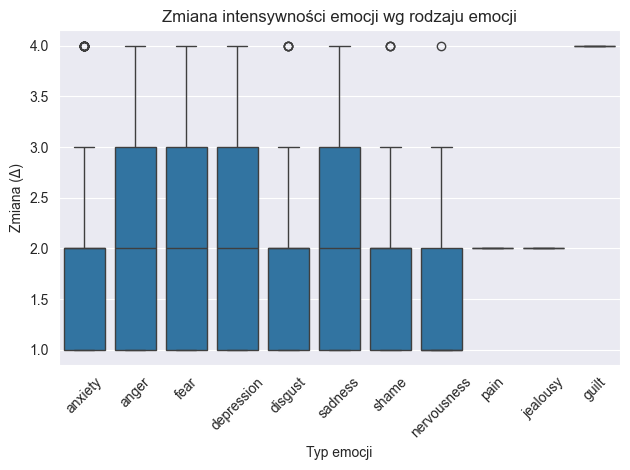

In [46]:
#✅ 2. Wizualizacja zmian intensywności emocji
#Użyj np. wykresu pudełkowego (boxplot) lub słupkowego do pokazania zmian:
#Boxplot: zmiany Δ wg emocji lub problemów.
#Barplot: średnie Δ wg emocji/problemów.

import seaborn as sns
import matplotlib.pyplot as plt

df_viz = pd.DataFrame(intensities)

# Boxplot: zmiany wg emocji
sns.boxplot(x="emotion_type", y="change", data=df_viz)
plt.title("Zmiana intensywności emocji wg rodzaju emocji")
plt.ylabel("Zmiana (Δ)")
plt.xlabel("Typ emocji")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\juwieczo\AppData\Local\Temp\ipykernel_19132\3661058192.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="emotion_type", y="change", data=summary, palette="coolwarm")


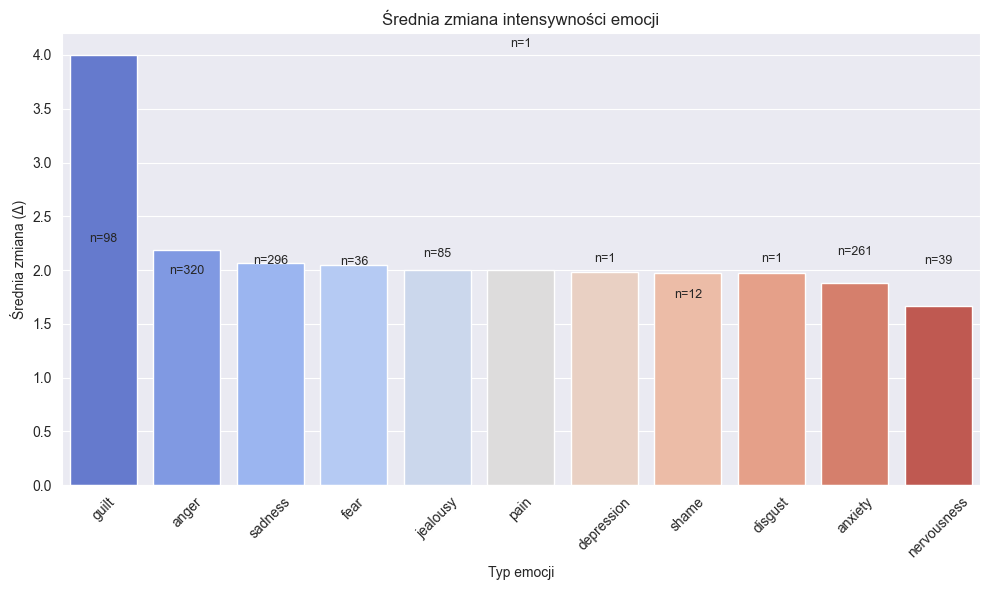

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(intensities)

# Agregacja
mean_changes = df.groupby("emotion_type")["change"].mean().reset_index()
counts = df["emotion_type"].value_counts().reset_index()
counts.columns = ["emotion_type", "n"]
summary = pd.merge(mean_changes, counts, on="emotion_type")

# Sortowanie wg średniej zmiany
summary.sort_values(by="change", ascending=False, inplace=True)

# Wykres
plt.figure(figsize=(10,6))
ax = sns.barplot(x="emotion_type", y="change", data=summary, palette="coolwarm")

# Dodanie etykiet z licznością
for i, row in summary.iterrows():
    ax.text(i, row["change"] + 0.05, f'n={row["n"]}', ha='center', va='bottom', fontsize=9)

plt.title("Średnia zmiana intensywności emocji")
plt.xlabel("Typ emocji")
plt.ylabel("Średnia zmiana (Δ)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
df_viz['change_level'] = pd.cut(df_viz['change'],
                                bins=[0, 1, 2, 5],
                                labels=["mała", "umiarkowana", "znaczna"])
print(df_viz['change_level'].value_counts())


change_level
umiarkowana    433
mała           417
znaczna        300
Name: count, dtype: int64


In [49]:
emotion_type_counter = Counter()
initial_intensity_counter = Counter()
final_intensity_counter = Counter()

for example in esc:
    # Zlicz typ emocji
    emotion = example.get("emotion_type")
    if emotion:
        emotion_type_counter[emotion] += 1

    # Zlicz intensywności
    seeker_scores = example.get("survey_score", {}).get("seeker", {})
    initial = seeker_scores.get("initial_emotion_intensity")
    final = seeker_scores.get("final_emotion_intensity")

    if initial is not None:
        initial_intensity_counter[int(initial)] += 1
    if final is not None:
        final_intensity_counter[int(final)] += 1

# Wyniki
print("Dystrybucja typów emocji:")
for emo, count in emotion_type_counter.items():
    print(f"{emo}: {count}")

print("\nPoczątkowa intensywność emocji:")
for val, count in sorted(initial_intensity_counter.items()):
    print(f"{val}: {count}")

print("\nKońcowa intensywność emocji:")
for val, count in sorted(final_intensity_counter.items()):
    print(f"{val}: {count}")


Dystrybucja typów emocji:
anxiety: 354
anger: 111
fear: 95
depression: 334
sadness: 308
disgust: 40
shame: 42
nervousness: 13
pain: 1
jealousy: 1
guilt: 1

Początkowa intensywność emocji:
1: 2
2: 37
3: 267
4: 567
5: 427

Końcowa intensywność emocji:
1: 329
2: 469
3: 290
4: 62


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Załaduj dane do DataFrame (tu zakładam, że masz listę słowników)
# df = pd.DataFrame(data)

# Przykład tylko z fragmentem, ale Twój kod używa pełnych danych
# Oblicz delta
df["delta"] = df["initial"] - df["final"]

# Dystrybucja typów emocji
plt.figure(figsize=(8, 4))
sns.countplot(x="emotion", data=df, order=df["emotion"].value_counts().index)
plt.title("Dystrybucja typów emocji")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Intensywność emocji: initial vs final
plt.figure(figsize=(10, 4))
sns.histplot(df["initial"], color="skyblue", label="Initial", kde=False, bins=5)
sns.histplot(df["final"], color="salmon", label="Final", kde=False, bins=5)
plt.title("Dystrybucja intensywności emocji (Initial vs Final)")
plt.legend()
plt.tight_layout()
plt.show()

# Rozkład delta
plt.figure(figsize=(6, 4))
sns.histplot(df["delta"], bins=range(0, 6), kde=False, color="lightgreen")
plt.title("Rozkład redukcji emocji (Delta = Initial - Final)")
plt.xlabel("Delta")
plt.ylabel("Liczba przypadków")
plt.tight_layout()
plt.show()

# Średnia delta per emocja
plt.figure(figsize=(8, 4))
sns.barplot(x="emotion", y="delta", data=df, estimator="mean", order=df["emotion"].value_counts().index)
plt.title("Średnia redukcja intensywności per emocja")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmapa emocji i problemów
pivot = pd.crosstab(df["problem"], df["emotion"])
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Macierz częstości: Problem vs Typ emocji")
plt.tight_layout()
plt.show()


KeyError: 'initial'

In [51]:
total = sum(emotion_type_counter.values())
emotion_percentages = {k: (v / total) * 100 for k, v in sorted(emotion_type_counter.items(), key=lambda x: x[1], reverse=True)}

# Wyświetlenie wyników
print(f"Łączna liczba emocji: {total}\n")
print("Liczba wystąpień (po normalizacji):")
for emo, count in emotion_type_counter.most_common():
    print(f"{emo:12s}: {count:5d} ({emotion_percentages[emo]:.2f}%)")


Łączna liczba emocji: 1300

Liczba wystąpień (po normalizacji):
anxiety     :   354 (27.23%)
depression  :   334 (25.69%)
sadness     :   308 (23.69%)
anger       :   111 (8.54%)
fear        :    95 (7.31%)
shame       :    42 (3.23%)
disgust     :    40 (3.08%)
nervousness :    13 (1.00%)
pain        :     1 (0.08%)
jealousy    :     1 (0.08%)
guilt       :     1 (0.08%)


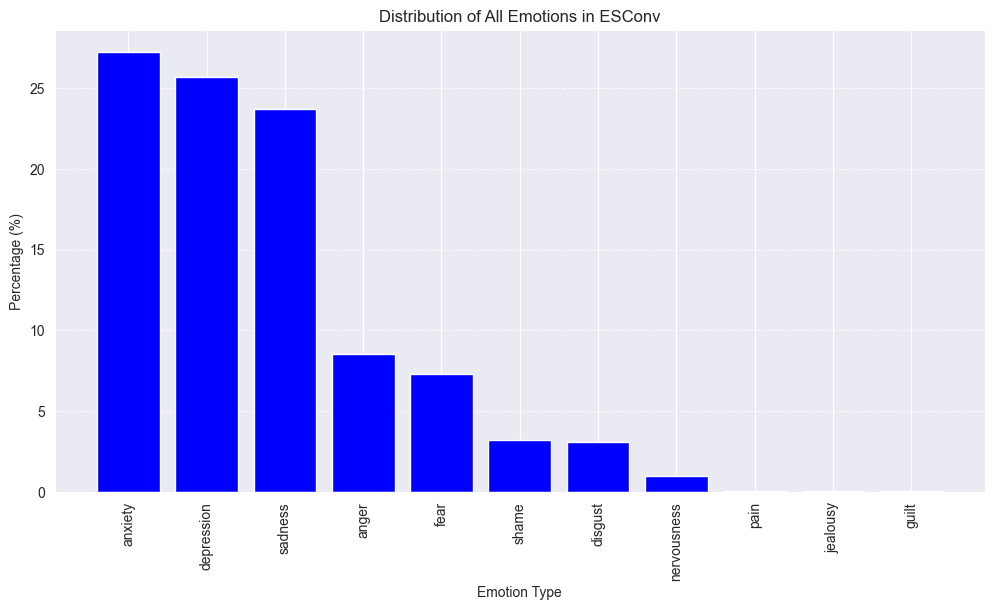

In [52]:
# Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.bar(emotion_percentages.keys(), emotion_percentages.values(), color='blue')
plt.xlabel("Emotion Type")
plt.ylabel("Percentage (%)")
plt.title("Distribution of All Emotions in ESConv")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()


In [53]:
# sprawdzanine podobienstwa

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

meisd_lengths = [len(text.split()) for text in meisd]
esconv_lengths = [len(text.split()) for text in esc]

plt.figure(figsize=(10, 5))
sns.histplot(meisd_lengths, color='blue', label='MEISD', kde=True)
sns.histplot(esconv_lengths, color='orange', label='ESConv', kde=True)
plt.title("Rozkład długości tekstów (liczba słów)")
plt.xlabel("Liczba słów")
plt.ylabel("Liczba przykładów")
plt.legend()
plt.show()


AttributeError: 'dict' object has no attribute 'split'

In [ ]:
df.head(5)

In [ ]:
max(df.dialog_ids)

In [ ]:
import statistics
statistics.mean(df.Utterances.str.len())

In [ ]:
max(df.Utterances.str.len())

In [ ]:
min(df.Utterances.str.len())

In [ ]:
df.describe()

In [ ]:
df.head(5)

In [ ]:
# Mapa poprawnych emocji
emotion_mapping = {
    "disgust": "disgust", "digust": "disgust",
    "joy": "joy",
    "neutral": "neutral",
    "anger": "anger", "anger1": "anger",
    "sadness": "sadness", "sadnes": "sadness", "asadness": "sadness",
    "acceptance": "acceptance",
    "surprise": "surprise", "sur": "surprise",
    "fear": "fear", "faer": "fear", "fera": "fear",
    "like": "like",
    "df": None, "l": None, "an": None  # Usuwamy błędne wartości
}

emotion_mapping = {
    "disgust": "disgust", "digust": "disgust",
    "anger": "anger", "anger1": "anger",
    "sadness": "sadness", "sadnes": "sadness", "asadness": "sadness",
    "fear": "fear", "faer": "fear", "fera": "fear",
    "anxiety": "anxiety",
    "depression": "depression",
    "shame": "shame",
    "nervousness": "nervousness",
    "pain": "pain",
    "jealousy": "jealousy",
    "guilt": "guilt"
}

def normalize_emotion(emotion):
    emotion = str(emotion).strip().lower()
    return emotion_mapping.get(emotion, None) if emotion != "nan" else None


df[['emotion', 'emotion2', 'emotion3']] = df[['emotion', 'emotion2', 'emotion3']].map(normalize_emotion)

# Filtrowanie tylko wybranych emocji
df_filtered = df[df[['emotion', 'emotion2', 'emotion3']].apply(lambda x: x.isin(emotion_mapping.values()).any(), axis=1)]

# Pobranie wszystkich emocji
all_emotions = df_filtered[['emotion', 'emotion2', 'emotion3']].values.flatten()
filtered_emotions = [emo for emo in all_emotions if emo]

# Zlicz wszystkie emocje
emotion_counts = Counter(filtered_emotions)

# Oblicz procentowy udział emocji
total_emotions = sum(emotion_counts.values())
emotion_percentages = {k: (v / total_emotions) * 100 for k, v in sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)}

# Wypisanie statystyk
print(f"Łączna liczba rekordów po filtracji: {len(df_filtered)}")
print("Liczba wystąpień poszczególnych emocji:")
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")


In [4]:
print(df[['emotion', 'emotion2', 'emotion3']].stack().value_counts())

disgust    6399
anger      3761
sadness    3687
fear       1245
Name: count, dtype: int64


In [3]:
import pandas as pd
from collections import Counter

# Mapowanie i normalizacja emocji
emotion_mapping = {
    "disgust": "disgust", "digust": "disgust",
    "anger": "anger", "anger1": "anger",
    "sadness": "sadness", "sadnes": "sadness", "asadness": "sadness",
    "fear": "fear", "faer": "fear", "fera": "fear",
    "anxiety": "anxiety",
    "depression": "depression",
    "shame": "shame",
    "nervousness": "nervousness",
    "pain": "pain",
    "jealousy": "jealousy",
    "guilt": "guilt"
}

def normalize_emotion(emotion):
    if pd.isna(emotion):
        return None
    return emotion_mapping.get(str(emotion).strip().lower(), None)

# Normalizacja emocji
for col in ['emotion', 'emotion2', 'emotion3']:
    df[col] = df[col].apply(normalize_emotion)

# Filtrowanie rekordów z przynajmniej jedną poprawną emocją
df_filtered = df[df[['emotion', 'emotion2', 'emotion3']].apply(lambda row: any(pd.notna(val) for val in row), axis=1)]

# Zebranie wszystkich emocji do jednej listy
all_emotions = df_filtered[['emotion', 'emotion2', 'emotion3']].values.flatten()
filtered_emotions = [emo for emo in all_emotions if emo is not None]

# Liczenie emocji
emotion_counts = Counter(filtered_emotions)
total = sum(emotion_counts.values())

# Oblicz procentowy udział emocji
emotion_percentages = {emotion: (count / total) * 100 for emotion, count in emotion_counts.items()}

# Wyświetlenie statystyk
print(f"Łączna liczba rekordów po filtracji: {len(df_filtered)}\n")
print("Rozkład emocji (liczbowo i procentowo):")
for emotion, count in emotion_counts.most_common():
    percentage = emotion_percentages[emotion]
    print(f"{emotion:12s}: {count:5d} ({percentage:.2f}%)")


Łączna liczba rekordów po filtracji: 10461

Rozkład emocji (liczbowo i procentowo):
disgust     :  6399 (42.40%)
anger       :  3761 (24.92%)
sadness     :  3687 (24.43%)
fear        :  1245 (8.25%)


In [ ]:
# Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.bar(emotion_percentages.keys(), emotion_percentages.values(), color='lightcoral')
plt.xlabel("Emotion Type")
plt.ylabel("Percentage (%)")
plt.title("Distribution of All Emotions")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

In [ ]:
df_filtered.to_csv("C:/Users/juwieczo/DataspellProjects/meisd_project/data/filtered_negative_MEISD_intensity.csv", index=False)

In [ ]:
meta_df = df_filtered

In [ ]:
# For the multilabel classification we use:
columns = ['Utterances', 'dialog_ids', 'intensity', 'intensity2', 'intensity3']
meta_dfs = meta_df[columns].copy()

In [ ]:
meta_dfs.loc[:, 'intensity'] = pd.to_numeric(meta_dfs['intensity'], errors='coerce')
meta_dfs.loc[:, 'intensity2'] = pd.to_numeric(meta_dfs['intensity2'], errors='coerce')
meta_dfs.loc[:, 'intensity3'] = pd.to_numeric(meta_dfs['intensity3'], errors='coerce')


#Zamień wartości na liczby całkowite
meta_dfs['intensity'] = pd.to_numeric(meta_dfs['intensity'], errors='coerce').fillna(0)
meta_dfs['intensity2'] = pd.to_numeric(meta_dfs['intensity2'], errors='coerce').fillna(0)
meta_dfs['intensity3'] = pd.to_numeric(meta_dfs['intensity3'], errors='coerce').fillna(0)

#Zamień wartości zawierające tylko białe znaki lub '`', 'neu', 'po' na NaN
meta_dfs['intensity'] = meta_dfs['intensity'].replace(r'^\s*$', np.nan, regex=True)
meta_dfs['intensity'] = meta_dfs['intensity'].replace(['`', 'neu', 'po'], np.nan)
meta_dfs['intensity2'] = meta_dfs['intensity2'].replace(r'^\s*$', np.nan, regex=True)
meta_dfs['intensity2'] = meta_dfs['intensity2'].replace(['`', 'neu', 'po'], np.nan)
meta_dfs['intensity3'] = meta_dfs['intensity3'].replace(r'^\s*$', np.nan, regex=True)
meta_dfs['intensity3'] = meta_dfs['intensity3'].replace(['`', 'neu', 'po'], np.nan)

#Użyj forward fill, aby uzupełnić brakujące wartości poprzedzającą wartością
meta_dfs['intensity'] = meta_dfs['intensity'].ffill()
meta_dfs['intensity2'] = meta_dfs['intensity2'].ffill()
meta_dfs['intensity3'] = meta_dfs['intensity3'].ffill()

#Usuń znaki niebędące cyframi (np. '`') za pomocą wyrażeń regularnych
meta_dfs['intensity'] = meta_dfs['intensity'].replace(r'\D', '', regex=True).astype(int)  # Usuwa wszystko, co nie jest cyfrą
meta_dfs['intensity2'] = meta_dfs['intensity2'].replace(r'\D', '', regex=True).astype(int)
meta_dfs['intensity3'] = meta_dfs['intensity3'].replace(r'\D', '', regex=True).astype(int)

In [ ]:
first_25_data = []
last_25_data = []

def process_group(group):
    num_rows = len(group)
    quarter_size = max(1, num_rows // 4)

    # First 25%
    first_25 = group.iloc[:quarter_size]
    last_25 = group.iloc[-quarter_size:]

    # Maksymalna intensywność
    first_25_max_intensity = first_25['intensity'].max()
    last_25_max_intensity = last_25['intensity'].max()

    # Łączenie wypowiedzi już tutaj
    first_utterances = " ".join(first_25['Utterances'])
    last_utterances = " ".join(last_25['Utterances'])

    first_25_data.append(pd.Series({
        'dialog_ids': group['dialog_ids'].iloc[0],
        'Utterances': first_utterances,
        'max_intensity': first_25_max_intensity
    }))

    last_25_data.append(pd.Series({
        'dialog_ids': group['dialog_ids'].iloc[0],
        'Utterances': last_utterances,
        'max_intensity': last_25_max_intensity
    }))

meta_dfs.groupby('dialog_ids').apply(process_group)

first_25_df = pd.DataFrame(first_25_data)
last_25_df = pd.DataFrame(last_25_data)


In [ ]:
first_25_df

In [ ]:
first_25_df.to_csv('C:/Users/juwieczo/DataspellProjects/meisd_project/data/filtered_negative_MEISD_intensity_max_first_25_conv.csv', index=False, header=True)

In [ ]:
last_25_df.head()

In [ ]:
# Tworzenie nowej kolumny bazującej na intensity
last_25_df['binary_intensity'] = (last_25_df['max_intensity'] == 2).astype(int)

In [ ]:
last_25_df

In [ ]:
import matplotlib.pyplot as plt

# Emotion counts
emotions = ['disgust', 'joy', 'neutral', 'anger', 'sadness', 'acceptance', 'surprise', 'fear', 'like']
counts = [6399, 4011, 3833, 3761, 3687, 3216, 2352, 1245, 466]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotions, counts)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Class Imbalance in MEISD Emotion Annotations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   Data_Augmentation  naug   Mean_F1     SD_F1
0                  0     9  0.564056  0.054156
1                  1    25  0.664332  0.031937
T-test for data augmentation effect on F1:
 t = 5.237, p = 0.0004

ANOVA for model type:
             sum_sq    df         F    PR(>F)
C(Model)  0.028446   4.0  2.396968  0.073157
Residual  0.086039  29.0       NaN       NaN

ANOVA for Model Type:
                               sum_sq    df          F    PR(>F)
C(Learning_Rate_scheduler)  0.058215   1.0  33.105712  0.000002
Residual                    0.056270  32.0        NaN       NaN

Linear regression summary:

                            OLS Regression Results                            
Dep. Variable:                 Val_F1   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     7.999
Date:                Mon, 19 May 2025   Prob (F-statistic):           3.4

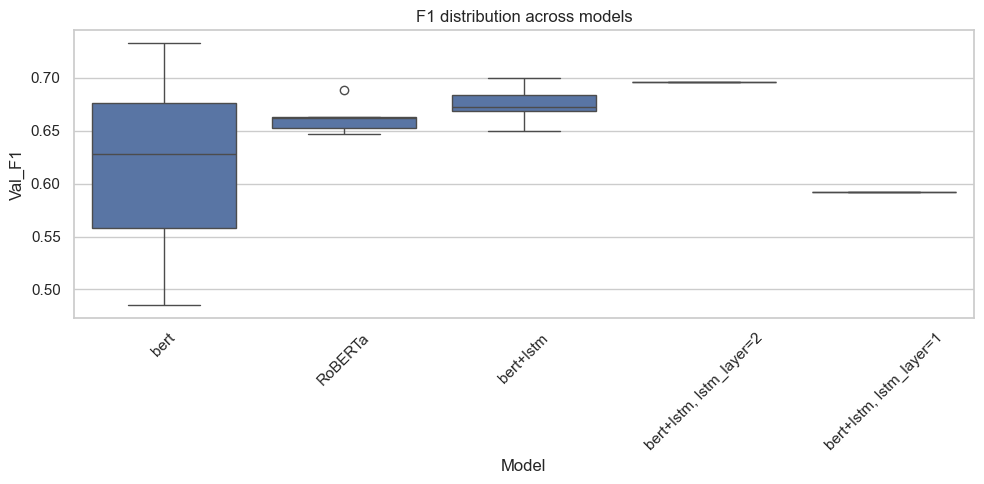

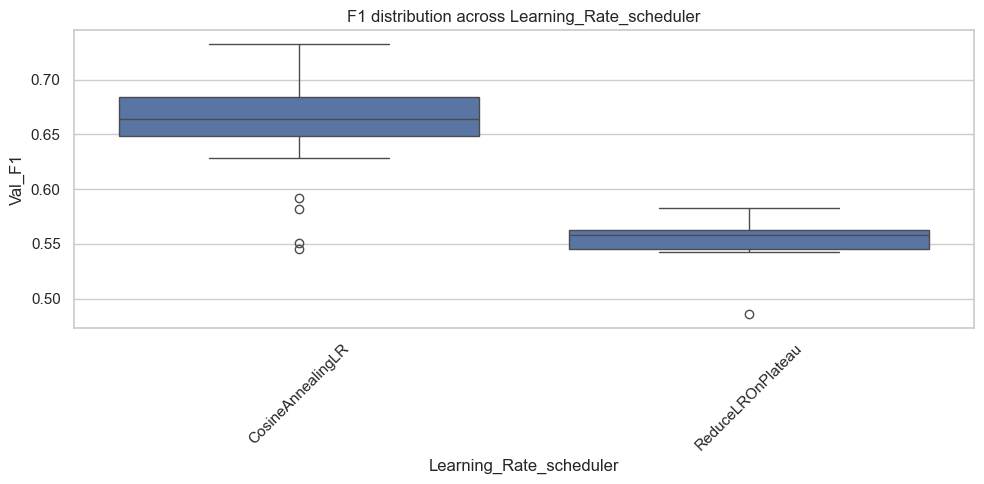

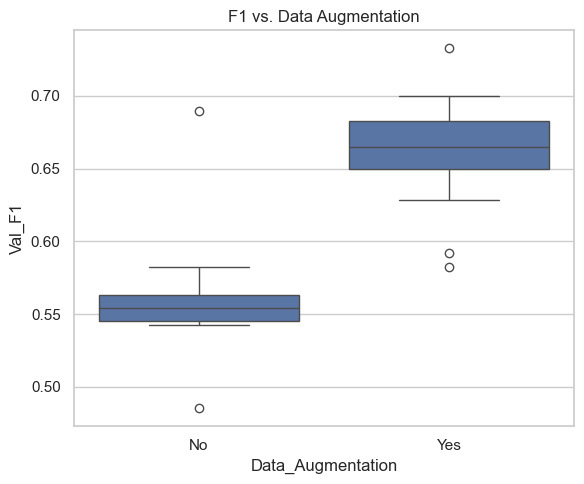

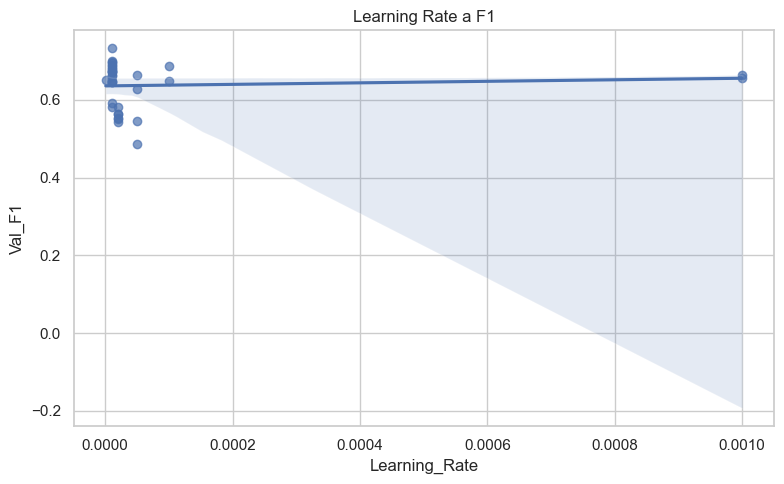

In [14]:
import pandas as pd
import seaborn as sns

import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


# === 1. Wczytanie danych ===
df = pd.read_excel("C:/Users/juwieczo/Documents/artykulyMEISD/Mulcticlass-moja analiza.xlsx", sheet_name="binary_classification") 

# === 2. Czyszczenie danych ===
# Zamiana pustych wartości w 'Val F1' na NaN i rzutowanie na float
df["Val F1"] = pd.to_numeric(df["Val F1"], errors="coerce")
df["Val Acc"] = pd.to_numeric(df["Val Acc"], errors="coerce")
df = df.dropna(subset=["Val F1", "Val Acc"])

# Standaryzacja nazw kolumn
df.columns = df.columns.str.strip().str.replace(" ", "_")
# 
# Zamiana wartości 'Yes'/'No' w data augmentation na 1/0
df["Data_Augmentation"] = df["Data_Augmentation"].map({"Yes": 1, "No": 0})
# Czyszczenie kolumn
# df['model_type'] = df['Model'].str.extract(r'^(BERT|distilBERT)').fillna('Other')
df["Val_F1"] = df["Val_F1"].astype(float)
df['Val_Acc'] = df['Val_Acc'].astype(float)

summary = (
    df
    .groupby('Data_Augmentation')['Val_F1']
    .agg(
        naug='count',
        Mean_F1='mean',
        SD_F1='std'
    )
    .reset_index()
)

# summary['Group'] = summary['Data_Augmentation'].map({
#     'No': 'Data_Augmentation = No',
#     'Yes': 'Data_Augmentation = Yes'
# })
# summary = summary[['Group', 'naug', 'Mean_F1', 'SD_F1']]

print(summary)
# 
# Test t: Czy data augmentation wpływa na wynik?
t_stat, p_val = stats.ttest_ind(
    df[df['Data_Augmentation'] == 1]["Val_F1"],
    df[df['Data_Augmentation'] == 0]["Val_F1"],
    equal_var=False
)

print(f"T-test for data augmentation effect on F1:\n t = {t_stat:.3f}, p = {p_val:.4f}\n")

# ANOVA: Czy model_type wpływa na wynik?
anova = smf.ols('Val_F1 ~ C(Model)', data=df).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print("ANOVA for model type:\n", anova_table)

df["Learning_Rate_scheduler"] = df["Learning_Rate_scheduler"].astype("category")
anova = smf.ols("Val_F1 ~ C(Learning_Rate_scheduler)", data=df).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print("\nANOVA for Model Type:\n", anova_table)


# Regresja liniowa (Val_F1_final jako zmienna zależna)
model = smf.ols('Val_F1 ~ Learning_Rate + Weight_Decay + Data_Augmentation + C(Model) + C(Learning_Rate_scheduler)', data=df).fit()

print("\nLinear regression summary:\n")
print(model.summary())

# === 6. Wykresy ===
sns.set(style="whitegrid")

# Boxplot F1 vs. model
plt.figure(figsize=(10, 5))
sns.boxplot(x="Model", y="Val_F1", data=df)
plt.title("F1 distribution across models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Learning_Rate_scheduler", y="Val_F1", data=df)
plt.title("F1 distribution across Learning_Rate_scheduler")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Boxplot F1 vs. Data Augmentation
plt.figure(figsize=(6, 5))
sns.boxplot(x="Data_Augmentation", y="Val_F1", data=df)
plt.title("F1 vs. Data Augmentation")
plt.xticks([0, 1], ["No", "Yes"])
plt.tight_layout()
plt.show()

# Scatterplot z regresją
plt.figure(figsize=(8, 5))
sns.regplot(x="Learning_Rate", y="Val_F1", data=df, scatter_kws={"alpha": 0.7})
plt.title("Learning Rate a F1")
plt.tight_layout()
plt.show()


   Data_Augmentation  naug   Mean_F1     SD_F1
0                  0    16  0.209456  0.103840
1                  1    15  0.446813  0.217518

T-test for Data Augmentation:
 t = 3.918, p = 0.0005

ANOVA for Model Type:
             sum_sq    df       F    PR(>F)
C(Model)  0.208971   3.0  1.7889  0.173059
Residual  1.051337  27.0     NaN       NaN

Regresja liniowa:
                             OLS Regression Results                            
Dep. Variable:                 Val_F1   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     5.623
Date:                Mon, 19 May 2025   Prob (F-statistic):           0.000921
Time:                        21:18:48   Log-Likelihood:                 19.261
No. Observations:                  31   AIC:                            -24.52
Df Residuals:                      24   BIC:                            -14.48


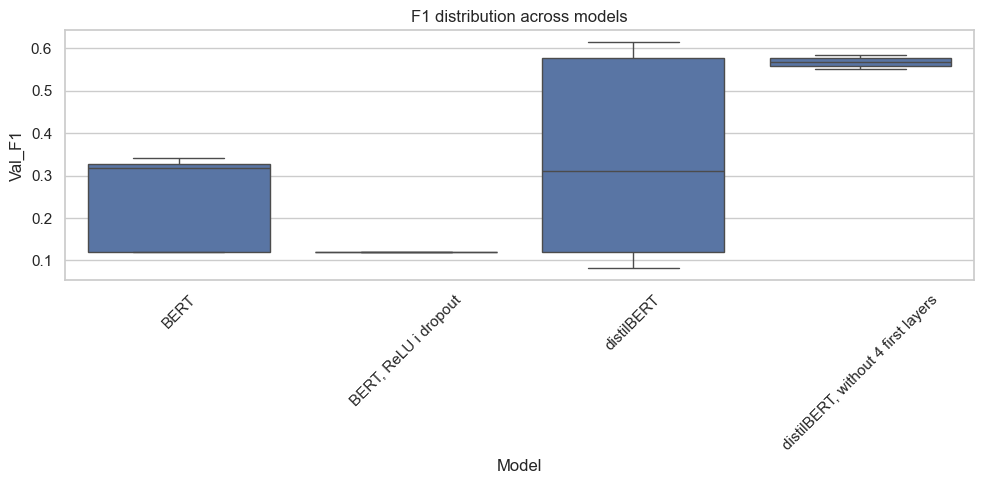

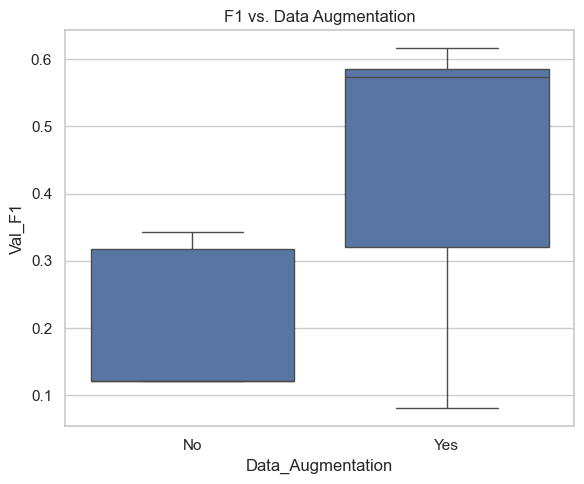

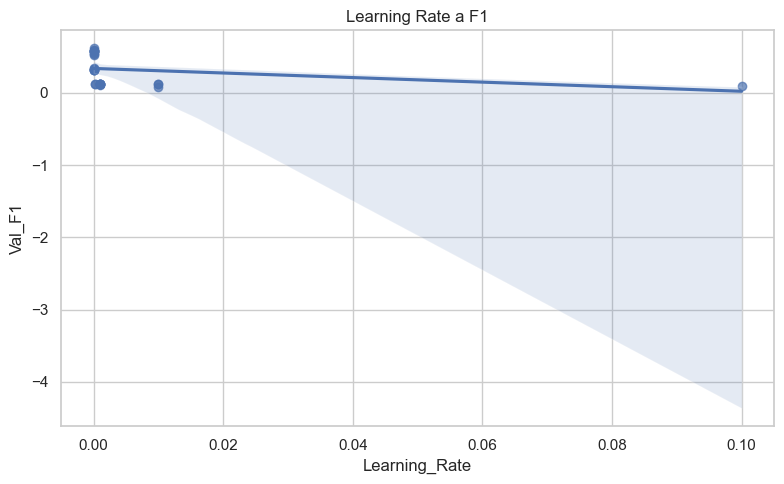

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# === 1. Wczytanie danych ===
df = pd.read_excel("C:/Users/juwieczo/Documents/artykulyMEISD/Mulcticlass-moja analiza.xlsx", sheet_name="multiclass_classification")

# === 2. Czyszczenie danych ===
# Zamiana pustych wartości w 'Val F1' na NaN i rzutowanie na float
df["Val F1"] = pd.to_numeric(df["Val F1"], errors="coerce")
df["Val Acc"] = pd.to_numeric(df["Val Acc"], errors="coerce")
df = df.dropna(subset=["Val F1", "Val Acc"])

# Standaryzacja nazw kolumn
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Zamiana wartości 'Yes'/'No' w data augmentation na 1/0
df["Data_Augmentation"] = df["Data_Augmentation"].map({"Yes": 1, "No": 0})

summary = (
    df
    .groupby('Data_Augmentation')['Val_F1']
    .agg(
        naug='count',
        Mean_F1='mean',
        SD_F1='std'
    )
    .reset_index()
)

print(summary)

# === 3. Test t-Studenta: czy Data Augmentation wpływa na Val F1? ===
aug = df[df["Data_Augmentation"] == 1]["Val_F1"]
no_aug = df[df["Data_Augmentation"] == 0]["Val_F1"]
t_stat, p_val = ttest_ind(aug, no_aug)
print(f"\nT-test for Data Augmentation:\n t = {t_stat:.3f}, p = {p_val:.4f}")

# === 4. ANOVA: czy model wpływa na wynik? ===
df["Model"] = df["Model"].astype("category")
anova = smf.ols("Val_F1 ~ C(Model)", data=df).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print("\nANOVA for Model Type:\n", anova_table)

# === 5. Regresja liniowa z wybranymi zmiennymi ===
# Konwersja na odpowiednie typy
# Model regresji
model = smf.ols('Val_F1 ~ Learning_Rate + Weight_Dacay + Data_Augmentation + C(Model)', data=df).fit()
print("\nRegresja liniowa:\n", model.summary())

# === 6. Wykresy ===
sns.set(style="whitegrid")

# Boxplot F1 vs. model
plt.figure(figsize=(10, 5))
sns.boxplot(x="Model", y="Val_F1", data=df)
plt.title("F1 distribution across models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Boxplot F1 vs. Data Augmentation
plt.figure(figsize=(6, 5))
sns.boxplot(x="Data_Augmentation", y="Val_F1", data=df)
plt.title("F1 vs. Data Augmentation")
plt.xticks([0, 1], ["No", "Yes"])
plt.tight_layout()
plt.show()

# Scatterplot z regresją
plt.figure(figsize=(8, 5))
sns.regplot(x="Learning_Rate", y="Val_F1", data=df, scatter_kws={"alpha": 0.7})
plt.title("Learning Rate a F1")
plt.tight_layout()
plt.show()